In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

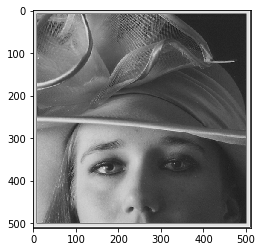

In [40]:
img = cv2.imread("low.jpg")
img[:,:,0], img[:,:,2] = np.array(img[:,:,2]), np.array(img[:,:,0])
img = 0.3 * img[:,:,0] + 0.59 * img[:,:,1] + 0.11 * img[:,:,2]
dim = img.shape
plt.imshow(img, cmap="gray")

In [41]:
mmin = np.amin(img).astype(int)
mmax = np.amax(img).astype(int)
lmin = 0
lmax = 256
print(lmin, lmax, mmin, mmax)

0 256 93 251


In [42]:
slope = (lmax - lmin) / (mmax - mmin)
intercept = slope * mmin
print(slope, intercept)

1.620253164556962 150.68354430379748


In [43]:
out = np.array(img)
for i in range(dim[0]):
    for j in range(dim[1]):
        if img[i][j] <= mmax or img[i][j] >= mmin:
#             out[i][j] = mp[img[i][j]].astype(int)
            out[i][j] = slope * img[i][j] - intercept
        if img[i][j] < mmin:
            out[i][j] = 0
        elif img[i][j] > mmax:
            out[i][j] = 255

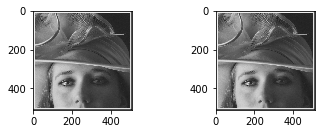

In [49]:
plt.subplot(221)
plt.imshow(out, cmap="gray")
plt.subplot(222)
plt.imshow(img, cmap="gray")